In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [74]:
data = pd.read_csv("/content/drive/MyDrive/Abhishek/ann/Copy of data.csv")

In [75]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-08-27,9982.179688,10159.879883,9936.620117,10150.650391,10150.650391,207760000
1,2010-08-30,10145.580078,10150.570313,10007.679688,10009.730469,10009.730469,150480000
2,2010-08-31,10006.419922,10073.379883,9941.839844,10014.719727,10014.719727,255420000
3,2010-09-01,10016.009766,10279.080078,10016.009766,10269.469727,10269.469727,205710000
4,2010-09-02,10270.080078,10320.370117,10253.959961,10320.099609,10320.099609,149930000


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2014 non-null   object 
 1   Open       2014 non-null   float64
 2   High       2014 non-null   float64
 3   Low        2014 non-null   float64
 4   Close      2014 non-null   float64
 5   Adj Close  2014 non-null   float64
 6   Volume     2014 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.3+ KB


In [77]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2.014000e+03
mean,16756.880170,16835.962791,16676.660195,16762.755255,16762.755255,1.699523e+08
std,3985.884743,3992.888506,3977.350484,3984.242430,3984.242430,1.072222e+08
min,9982.179688,10073.379883,9936.620117,10009.730469,10009.730469,8.410000e+06
25%,13104.239746,13175.674805,13045.425049,13107.277588,13107.277588,9.486500e+07
50%,16566.544922,16652.890625,16500.360352,16571.265625,16571.265625,1.284750e+08
75%,18282.699219,18350.062988,18205.062500,18287.908203,18287.908203,2.177400e+08
max,26584.279297,26616.710938,26435.339844,26616.710938,26616.710938,8.239400e+08


In [79]:
predictor = data.iloc[:,[1,2,3,5,6,]] #X
target = data.iloc[:,4] #y

In [80]:
predictor.head()

,Open,High,Low,Adj Close,Volume
0,9982.179688,10159.879883,9936.620117,10150.650391,207760000
1,10145.580078,10150.570313,10007.679688,10009.730469,150480000
2,10006.419922,10073.379883,9941.839844,10014.719727,255420000
3,10016.009766,10279.080078,10016.009766,10269.469727,205710000
4,10270.080078,10320.370117,10253.959961,10320.099609,149930000


In [81]:
target.head()

0    10150.650391
1    10009.730469
2    10014.719727
3    10269.469727
4    10320.099609
Name: Close, dtype: float64

In [82]:
##Standarize Features

In [83]:
# Standarize features
scaler = StandardScaler() #Class instantiation
predictor = scaler.fit_transform(predictor) #Standardized 

In [84]:
predictor

array([[-1.70009507, -1.67240857, -1.69502638, -1.65997605,  0.35269814],
       [-1.65909013, -1.67474068, -1.67715589, -1.69535415, -0.1816524 ],
       [-1.69401204, -1.69407746, -1.69371369, -1.69410159,  0.79730615],
       ...,
       [ 2.24798371,  2.23617932,  2.24611271,  2.23290482,  0.40409953],
       [ 2.24138898,  2.2520841 ,  2.26637257,  2.26638729,  0.28338556],
       [ 2.29010566,  2.31258655,  2.31519378,  2.33148258,  0.47163964]])

# Train, Test Data Split

In [85]:
#Let us now split the dataset into train & test
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(predictor, target, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (1409, 5)
x_test  (605, 5)
y_train  (1409,)
y_test  (605,)


# Neural Network from SkLearn

In [86]:
# Import Neural Network library
from sklearn.neural_network import MLPRegressor

In [87]:
# Build model with neural network
#By default just one hidden layer with 100 neurons/perceptrons with Relu
#Batch size = 200
#max_iter = 200
#solver = 'adam'
nn_model = MLPRegressor().fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [88]:
len(nn_model.coefs_)  # nn_model.coefs_ checking the model no of weights and biaes

2

In [89]:
# Predict using built model
predictvalues = nn_model.predict(x_test)

In [90]:
nn_model.score(x_train, y_train) # it gives the r2 value and r2 value epresents the proportion of the variance for a dependent variable that's explained by an independent variable 

-16.11450736323265

In [91]:
# Check RMSE (Root Mean Square Error)RMSE is a good measure of accuracy, but only to compare prediction errors of different models 
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(y_test, predictvalues)))

16299.67952571143


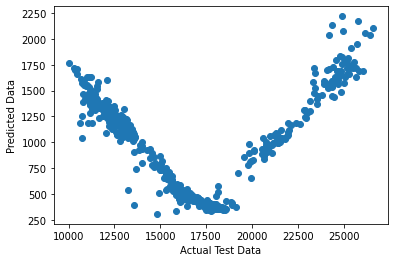

In [92]:
# Checking scatter of data between Y_test and predicted values
plt.scatter(y_test,predictvalues)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.show()

#Build Model with Neural Network
#With Hidden layers, Activation function, Solver and Learning Rate

In [133]:
nnl_model = MLPRegressor(hidden_layer_sizes=(10,15,10), activation='relu', solver='lbfgs', alpha=0.001,
                        learning_rate='adaptive',early_stopping=True,random_state=0).fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [134]:
# Predict using built model
predictvaluess = nnl_model.predict(x_test)

In [135]:
# Coefficient of determination R^2 of the predicted model 
nnl_model.score(x_train, y_train)

0.9999999771407247

In [136]:
# Check RMSE (Root Mean Square Error)
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(y_test, predictvaluess)))

0.6219343399134329


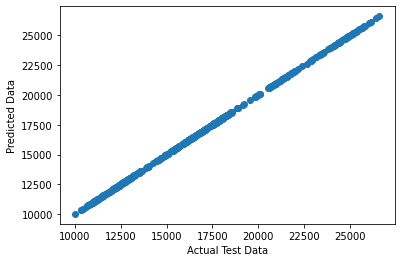

In [138]:
# Checking scatter of data between Y_test and predicted values
plt.scatter(y_test,predictvaluess)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.show()

# With keras bulding sequential model

In [140]:
from keras.models import Sequential
from keras.layers import Dense #A layer which is fully connected to its previous layer

In [142]:
model = Sequential() #Sequential means layer by layer building of ANN
model.add(Dense(units=10, input_dim=5, activation = 'relu')) #Adding 1st hidden layer with 10 neurons and relu as activation function and input dimension is no of features we have to input we have here 5 features.
model.add(Dense(units=3, activation='relu')) #Adding 2nd hidden layer with just 3 neurons
model.add(Dense(units=1)) #Output layer with no activation function ()regression problem


In [143]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                60        
                                                                 
 dense_4 (Dense)             (None, 3)                 33        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [157]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics = "mae" )

In [160]:
model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
45/45 - 0s - loss: 23693.9238 - mae: 85.1519 - 137ms/epoch - 3ms/step
Epoch 2/100
45/45 - 0s - loss: 22727.6523 - mae: 83.8636 - 90ms/epoch - 2ms/step
Epoch 3/100
45/45 - 0s - loss: 21716.6992 - mae: 80.4927 - 87ms/epoch - 2ms/step
Epoch 4/100
45/45 - 0s - loss: 20794.4961 - mae: 79.6271 - 130ms/epoch - 3ms/step
Epoch 5/100
45/45 - 0s - loss: 19977.9043 - mae: 79.1806 - 72ms/epoch - 2ms/step
Epoch 6/100
45/45 - 0s - loss: 19161.2441 - mae: 75.7338 - 82ms/epoch - 2ms/step
Epoch 7/100
45/45 - 0s - loss: 18435.0020 - mae: 74.7156 - 99ms/epoch - 2ms/step
Epoch 8/100
45/45 - 0s - loss: 17704.7773 - mae: 74.4983 - 129ms/epoch - 3ms/step
Epoch 9/100
45/45 - 0s - loss: 17031.8789 - mae: 71.9044 - 94ms/epoch - 2ms/step
Epoch 10/100
45/45 - 0s - loss: 16407.4980 - mae: 70.4312 - 156ms/epoch - 3ms/step
Epoch 11/100
45/45 - 0s - loss: 15814.3418 - mae: 69.1939 - 122ms/epoch - 3ms/step
Epoch 12/100
45/45 - 0s - loss: 15316.8574 - mae: 67.9595 - 99ms/epoch - 2ms/step
Epoch 13/100
45/45 -

In [162]:
# Predict using built model
predictvaluesss = model.predict(x_test)

In [170]:
model.evaluate(x_test,y_test)

19/19 [==============================] - 0s 2ms/step - loss: 5014.3433 - mae: 45.6079


[5014.34326171875, 45.607852935791016]

In [171]:
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(y_test, predictvaluesss)))

70.81204488089178
